In [3]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt

from numpy.random import normal

from scipy.stats import median_abs_deviation as mad

import muldoon
from muldoon import read_data as rd
from muldoon import met_timeseries as met
from muldoon import utils as ut

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Processing file: WE__0190___________DER_WS__________________P02.csv
Processing label: WE__0190___________DER_WS__________________P02.xml
Found a Header structure: HEADER
Found a Table_Delimited structure: TABLE
0   Header           'HEADER'  PDS DSV 1
1   Table_Delimited  'TABLE'   11 fields x 38489 records


OSError: Unable to read data from file 'WE__0190___________DER_WS__________________P02.CSV' found in label - [Errno 2] No such file or directory: 'WE__0190___________DER_WS__________________P02.CSV'

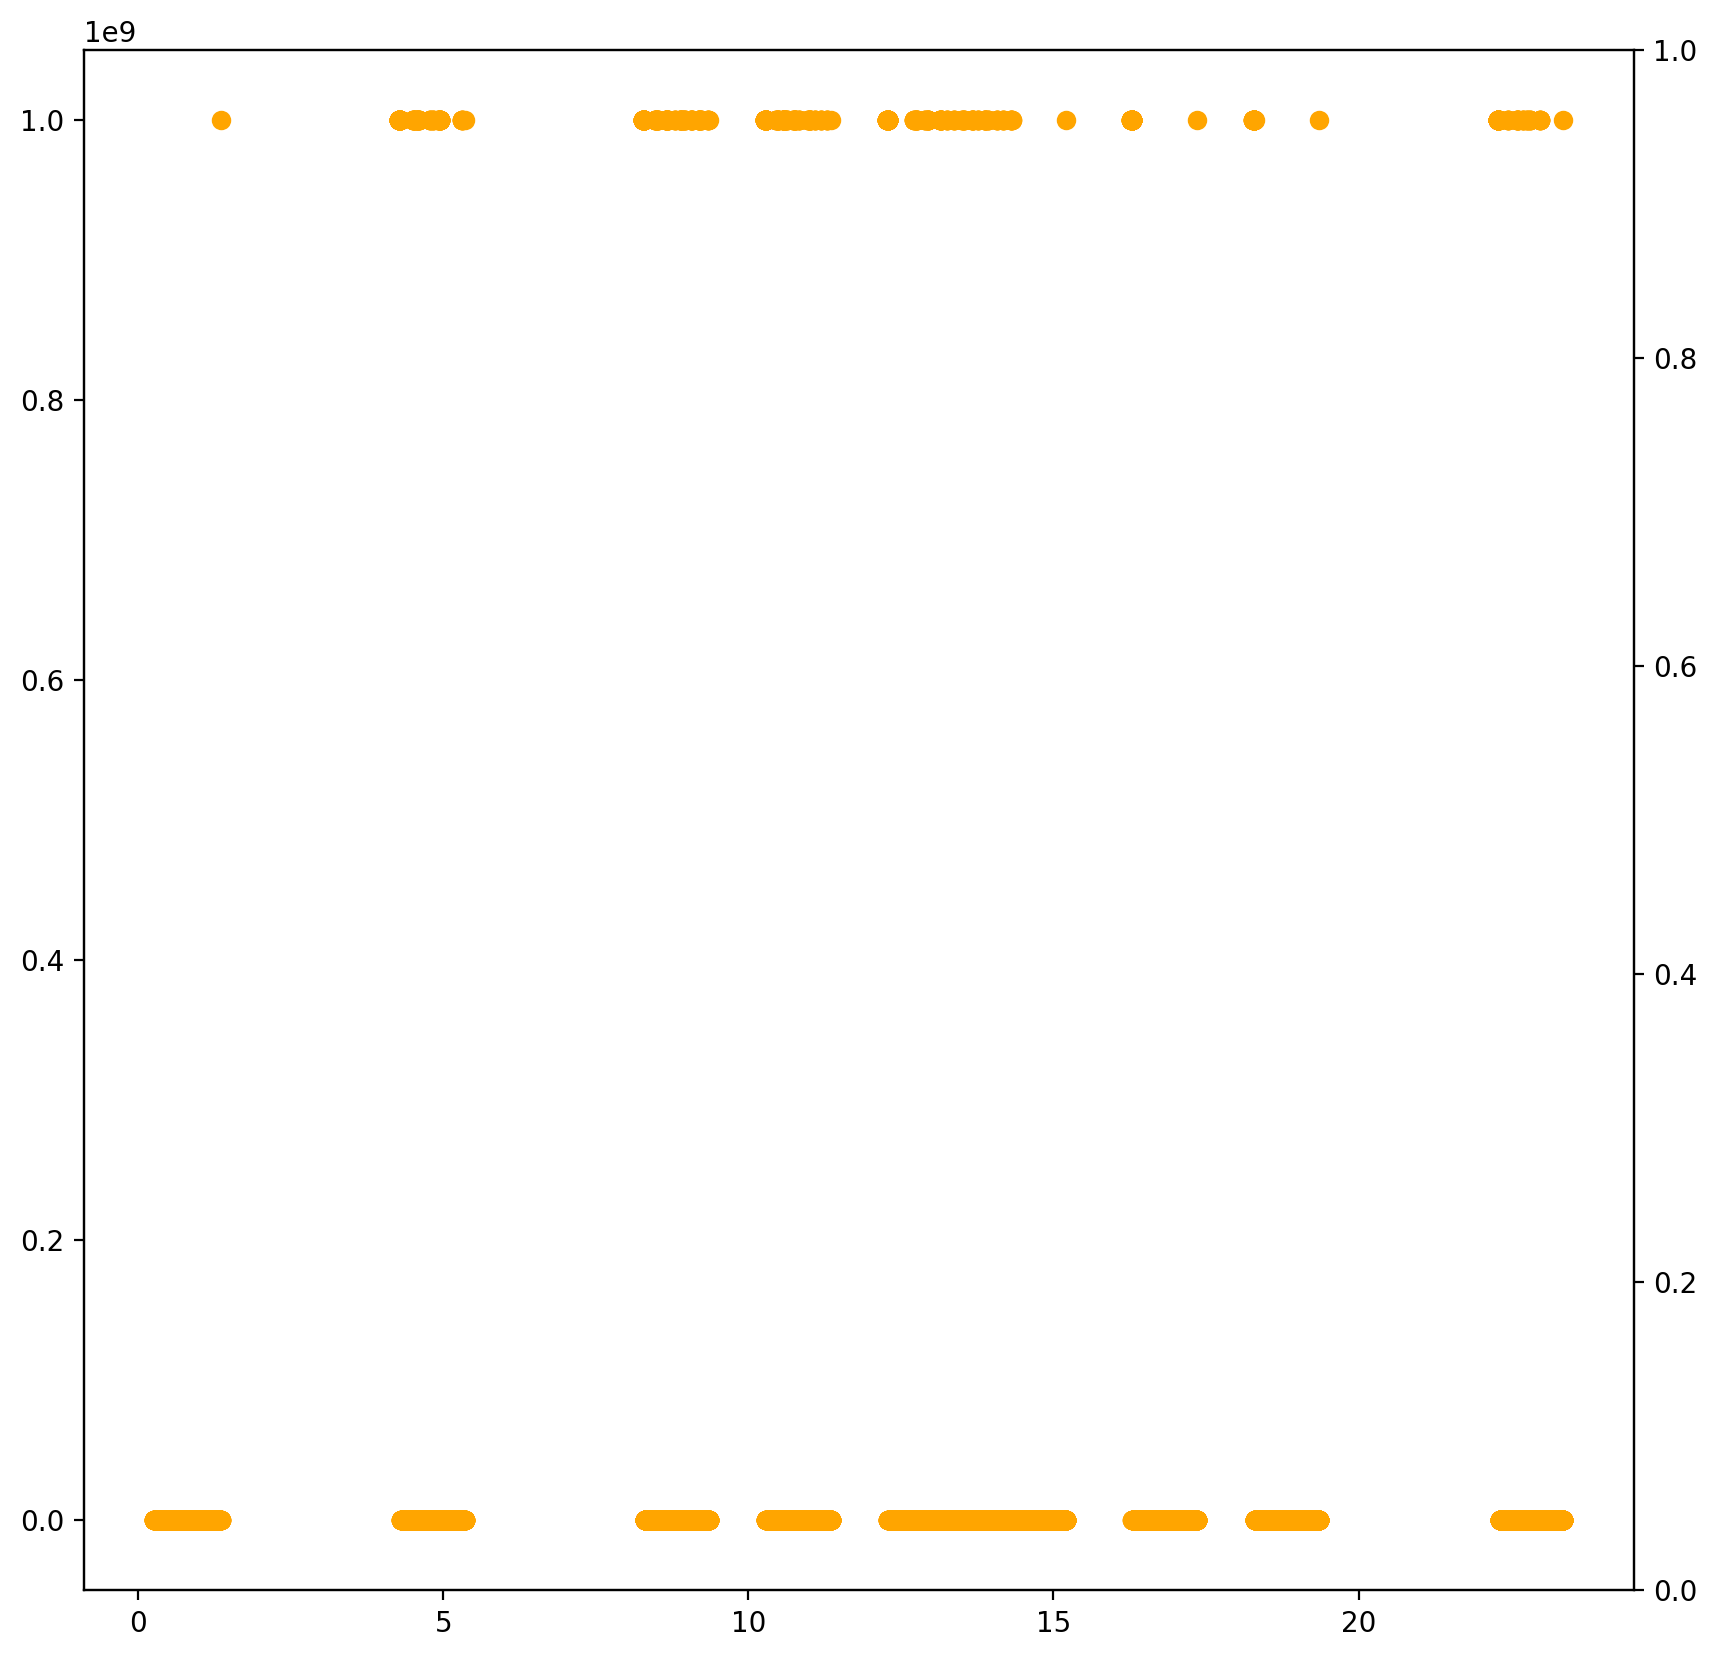

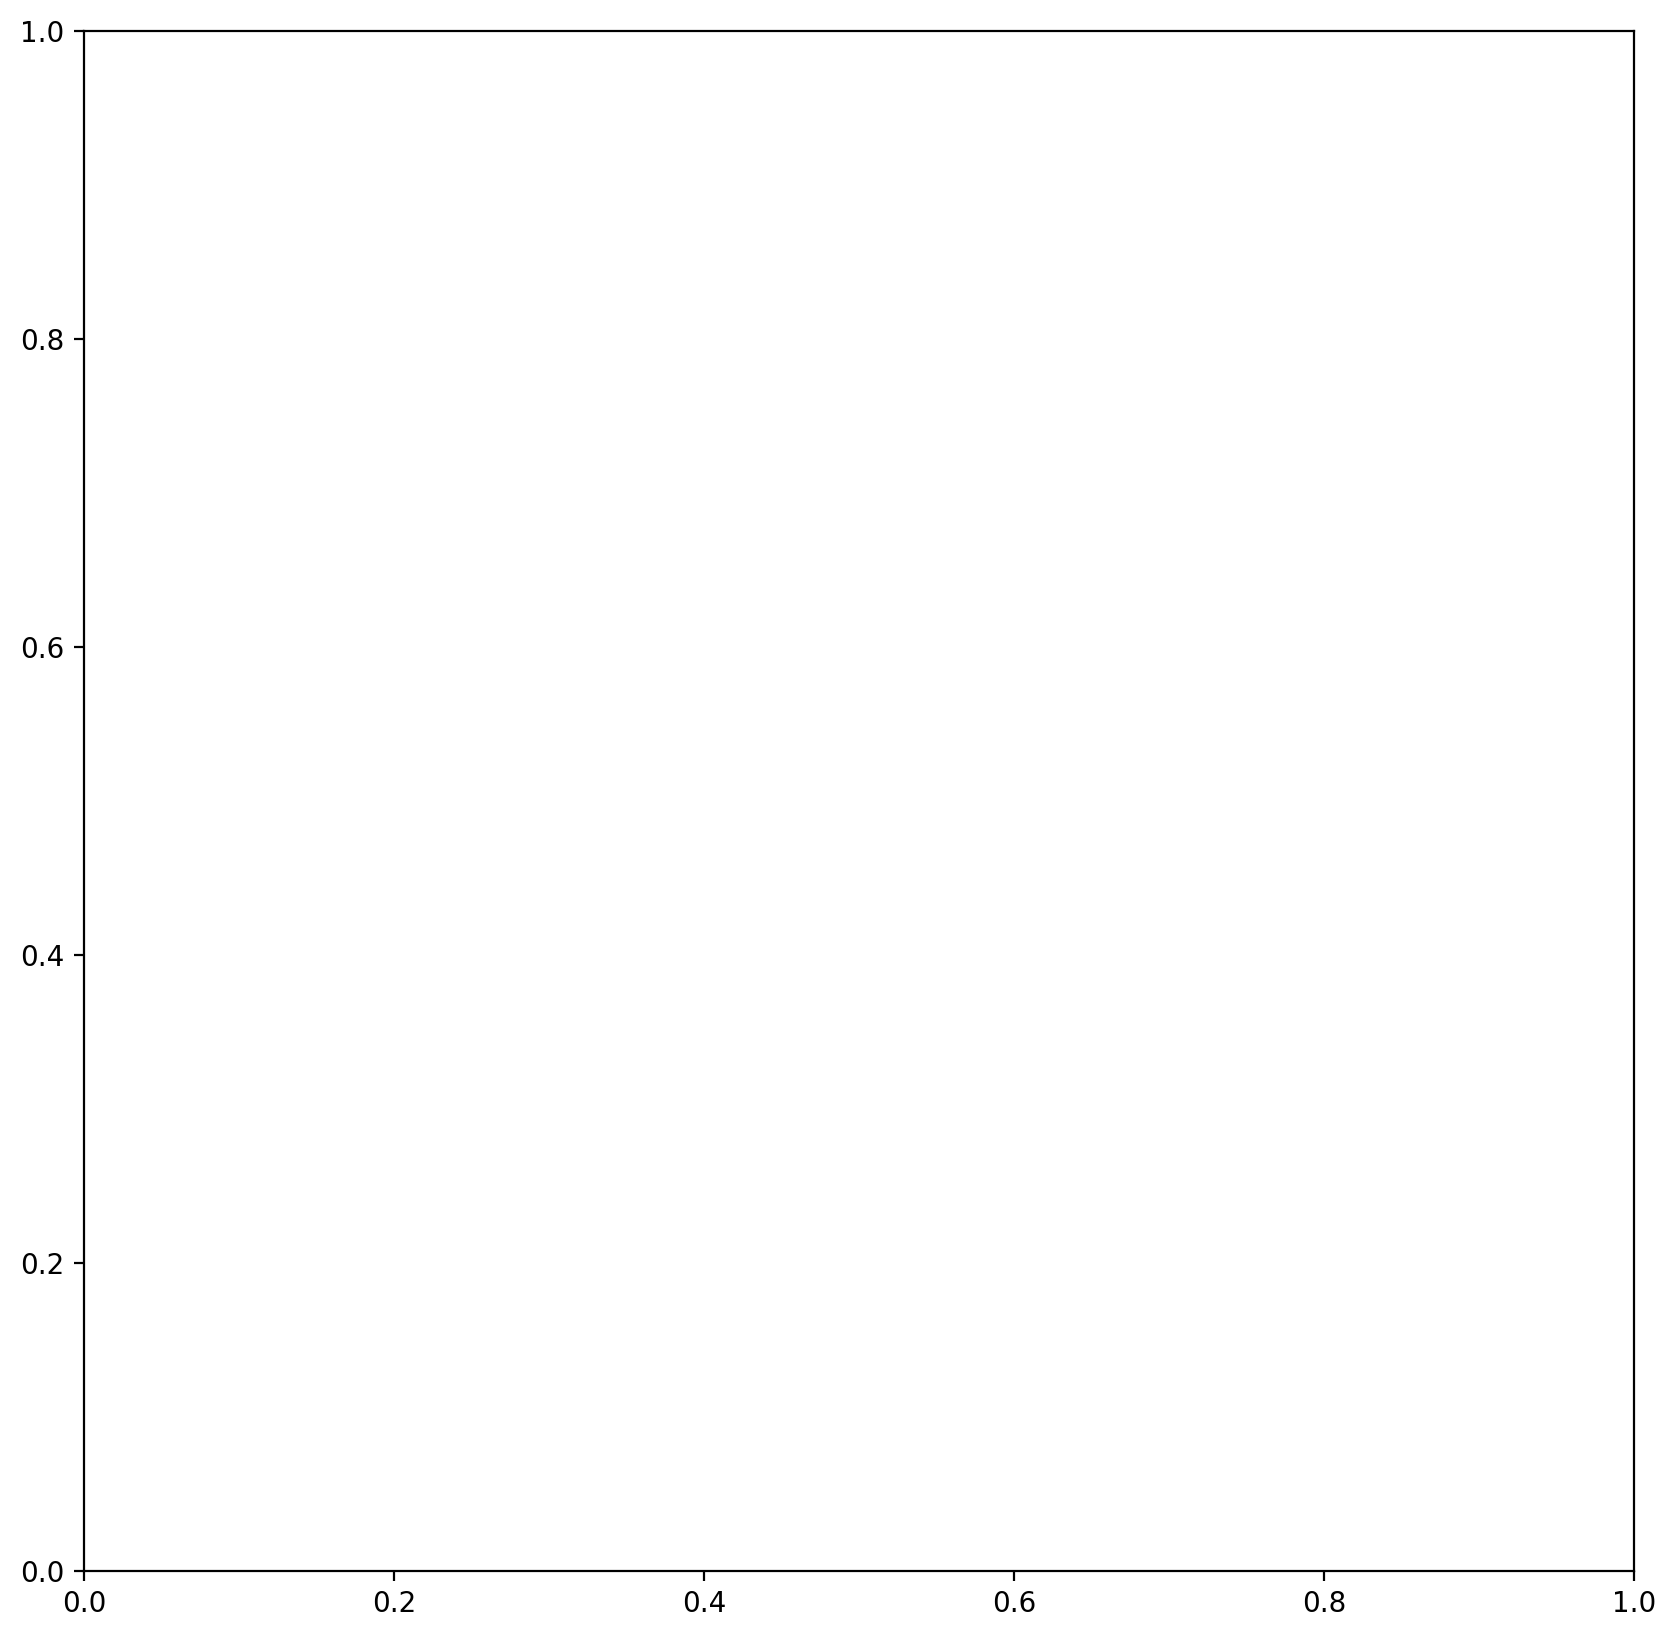

In [4]:
fig = plt.figure(figsize=(10,10))
fig2 = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax3 = fig2.add_subplot(111)
ax2 = ax.twinx()

# Plots time and horizontal wind speed
filename="WE__0190___________DER_WS__________________P02.csv"
time, hor_wind_speed = rd.read_Perseverance_WS_data(filename)
ax.scatter(time, hor_wind_speed, color='orange')

filename2="WE__0190___________DER_WS__________________P02.xml"
time, hor_wind_speed = rd.read_Perseverance_WS_data(filename2)
ax3.scatter(time, hor_wind_speed, color='blue')


In [ ]:
# Tests get_vortex method
result = [time, hor_wind_speed]
vortex = ut.get_vortex(result)
print(vortex)

{'time': array([ 0.26555556,  0.26583333,  0.26611111, ..., 23.35472222,
       23.355     , 23.35527778]), 'data': array([1.63000000e+00, 1.52000000e+00, 1.52000000e+00, ...,
       3.13000000e+00, 2.91000000e+00, 9.99999999e+08])}


c:\users\18582\source\repos\f22-dust-devils\muldoon\met_timeseries.py:29: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  self.sampling = mode(time[1:] - time[0:-1]).mode[0]


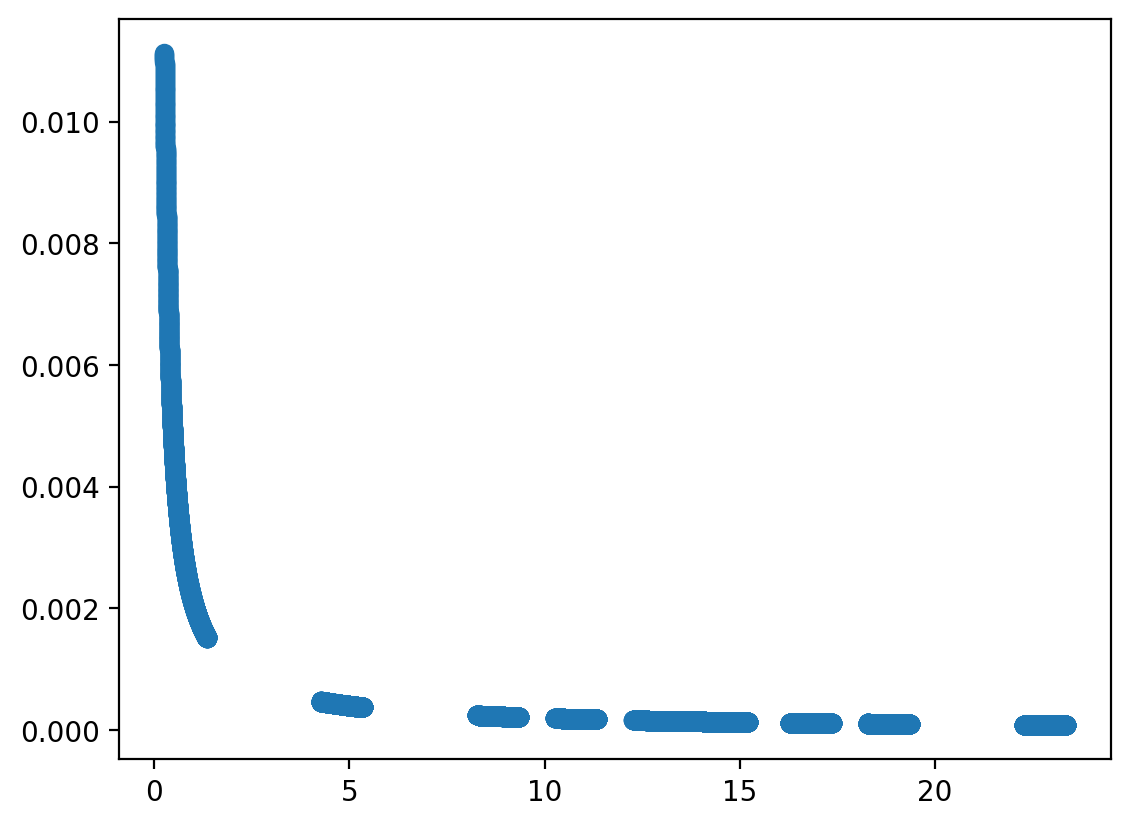

In [ ]:
time = time
max_wind_speed = 23
u_1 = 3.5
slope = 1.
t0 = 0.
Gamma = 0.01 
expected = 0.0000910710

# Create a wind speed time series
profile = ut.wind_vortex_profile(max_wind_speed, u_1, slope, time, t0, Gamma)
wt = met.WindSpeedTimeseries(time, profile)
plt.scatter(wt.time, wt.data)

In [ ]:
# Get init_params
init_params = wt._determine_init_params(vortex)
# Get bounds
bounds = wt._determine_bounds(vortex, init_params)

In [ ]:
# fit vortex: returns fit parameters and uncertainties
popt, unc = ut.fit_vortex_ws(vortex, init_params, bounds)
print(popt)
print(unc)

[3.37000000e+00 4.33093126e+07 2.65555556e-01 1.00602183e+09
 1.38888889e-03]
[1.16773869e+22 9.08645987e+14 4.46825386e+14 3.91300040e+13
 5.66775757e+25]
